<a href="https://colab.research.google.com/github/drtokunbo/FindSimilar/blob/master/Prediction_with_context_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the code for Predicting if the given text is generated by LLM/AI.
Detecting whether text is AI-generated or not can be valuable for several reasons:

Fraud Detection: AI-generated text can be used for various malicious purposes such as generating fake news, spam emails, or fraudulent reviews. Detecting AI-generated text helps in identifying and mitigating these fraudulent activities.

Content Moderation: Platforms hosting user-generated content (e.g., social media, forums) need to ensure the authenticity and integrity of the content. Detecting AI-generated text can assist in content moderation by identifying and flagging suspicious or inappropriate content.

Maintaining Trust: Authenticity and trustworthiness are crucial in many contexts, such as journalism, academic research, and customer reviews. Detecting AI-generated text helps in preserving trust by ensuring that the content is generated by humans rather than automated systems.

Regulatory Compliance: In certain industries or jurisdictions, there may be regulations or guidelines regarding the disclosure of AI-generated content. Detecting AI-generated text enables compliance with such regulations and promotes transparency in content creation and dissemination.

Preventing Misinformation: AI-generated text can be used to spread misinformation or propaganda, influencing public opinion and decision-making processes. Detecting AI-generated text aids in identifying and combating misinformation campaigns.

Overall, detecting AI-generated text serves to protect users, maintain the integrity of platforms and content, uphold regulatory standards, and mitigate the spread of misinformation in the digital ecosystem.

The code imports necessary TensorFlow and Keras components for building and training neural network models, such as Sequential, Dense, Dropout, Input, Model, and EarlyStopping.

Scikit-Learn Imports:
It imports train_test_split for splitting the dataset, LabelEncoder for encoding labels, and TfidfVectorizer for converting text data into TF-IDF features, which are essential for preprocessing text data.

Visualization Libraries:
seaborn and matplotlib.pyplot are imported for creating visualizations, such as plotting training and validation loss, accuracy, and other metrics.

NLP and TensorFlow Hub:
The code imports NLTK components (stopwords and word_tokenize) for text preprocessing and tensorflow_hub and tensorflow_text for leveraging pre-trained text models and additional text processing capabilities.

This setup provides the necessary tools and libraries for preprocessing text data, building, training, and evaluating machine learning models, and visualizing the results.

In [ ]:
#Setting up the environment and importing libraries
import tensorflow
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,Dropout
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import tensorflow_hub as hub
import tensorflow_text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras import Model
#generated - essay was written by a student (0) or generated by an LLM (1).


from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.layers import Dense, Dropout, Input, concatenate
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping


In [ ]:
import pandas as pd

df = pd.read_csv("/WAVE/users/unix/asarda/datafiles/train_v2_drcat_02.csv")
df.sample(10)

,text,label,prompt_name,source,RDizzl3_seven
27867,"As an 8th grade student, the idea of committin...",1,Seeking multiple opinions,mistral7binstruct_v1,False
41616,Participating in the Seagoing Cowboys program...,1,"""A Cowboy Who Rode the Waves""",cohere-command,True
36909,Online learning or video conferencing is a va...,1,Distance learning,mistral7binstruct_v2,False
18427,Driverless cars both have good and bad aspects...,0,Driverless cars,persuade_corpus,True
34617,Standardized testing has been a controversial ...,1,Seeking multiple opinions,llama_70b_v1,False
13038,The 'Face' on Mars is just a hoax. It seems as...,0,The Face on Mars,persuade_corpus,True
36459,The traditional four years of high school have...,1,Distance learning,mistral7binstruct_v1,False
27041,Positive Attitude: The Key to Success in Life\...,1,Seeking multiple opinions,mistral7binstruct_v1,False
3646,why are some schools require students to compl...,0,Summer projects,persuade_corpus,False
7382,Student should able to do at least participate...,0,Mandatory extracurricular activities,persuade_corpus,False


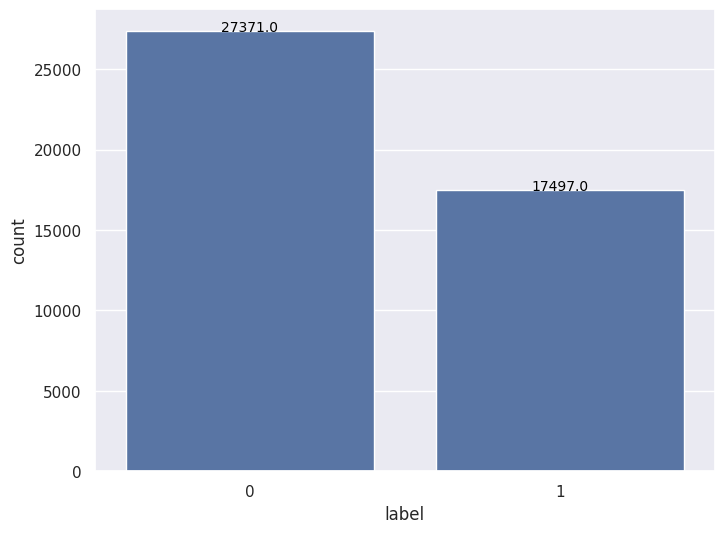

In [ ]:
#Frequency of Labels
sns.set()
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create a count plot
ax = sns.countplot(x="label", data=df)

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black')

plt.show()

The code removes below stopwords from the text data in the 'text' column of a DataFrame using NLTK's stopwords list and tokenization functionality, thereby preprocessing the text for  modeling. It first defines a function remove_stopwords that removes common English stopwords from a given text. It uses NLTK for tokenizing the text and identifying stopwords. The function is then applied to the 'text' column of the DataFrame df, preprocessing the text by removing these stopwords. Finally, the code displays a random sample of 5 rows from the DataFrame to show the effect of the stopword removal process.

In [ ]:
#import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

df['text'] = df['text'].apply(remove_stopwords)

df.sample(5)

,text,label,prompt_name,source,RDizzl3_seven
7922,"`` Challenge Exploring Venus , `` author gives...",0,Exploring Venus,persuade_corpus,True
10964,think using technology Facial Coding System wo...,0,Facial action coding system,persuade_corpus,True
37474,order graduate high school particular school d...,1,Distance learning,chat_gpt_moth,False
27274,"Ummm ... hey ! , like , community service tote...",1,Community service,llama2_chat,False
15435,"may concern , Requiring least B average partic...",0,Grades for extracurricular activities,persuade_corpus,False


This code snippet sets up a Seaborn count plot to visualize the frequency of each label in the DataFrame df, with a specified figure size for better visibility. It uses sns.countplot to create the plot and iterates over each bar to annotate it with its count, placing the annotations at the top center of each bar for clarity. The plt.show() function then displays the plot. Overall, it provides a clear and annotated visual representation of the label distribution in the dataset.

This code snippet initializes a LabelEncoder to transform categorical text data into numerical labels. It creates a new DataFrame df_prompt from the existing DataFrame df. The LabelEncoder is used to convert the 'prompt_name' column into a new column 'prompt_id', assigning a unique numerical value to each unique prompt name. Finally, it displays a random sample of 5 rows from the updated DataFrame to show the newly created 'prompt_id' column.

The promtp refers to the topic on which the LLM and Student has generated.This is useful to understand the context of the conversation. So, I first converted my prompts into a numerical id using label encodng that provides label to all the prompts.
Text and prompt_id are separated: This ensures that the text data is correctly processed by BERT.


In [ ]:
#to label encoder the prompts
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame

df_prompt = pd.DataFrame(df)

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the 'prompt_name' column to get prompt_id
df_prompt['prompt_id'] = le.fit_transform(df_prompt['prompt_name'])

df_prompt.sample(5)


,text,label,prompt_name,source,RDizzl3_seven,prompt_id
21538,"January24,2011 Dear TEACHER_NAME think let stu...",0,Cell phones at school,persuade_corpus,False,2
12955,"Think dont think alien made face , could alien...",0,The Face on Mars,persuade_corpus,True,14
29434,know one students recently 1000 dollars cash p...,1,Mandatory extracurricular activities,mistral7binstruct_v2,False,10
10681,use facial technology classroom fantastic idea...,0,Facial action coding system,persuade_corpus,True,8
17865,thought driverless cars amazing . dangers thin...,0,Driverless cars,persuade_corpus,True,6


This code snippet vectorizes the text data in the DataFrame using TF-IDF, limiting to 5000 features. It extracts text features and the 'prompt_id' column, encoding them for use in a machine learning model. The labels in the 'label' column are also encoded using LabelEncoder to convert them into numerical format. The resulting arrays are ready for model training or further processing.

In [ ]:

# Vectorize the text data
tfidf = TfidfVectorizer(max_features=5000)  # Limit to 5000 features
text_features = tfidf.fit_transform(df_prompt['text']).toarray()

# Combine text features with prompt_id
X_text = df_prompt['text'].values
X_prompt_id = df_prompt[['prompt_id']].values

# Encode labels
le = LabelEncoder()
y = le.fit_transform(df_prompt['label'].values)

Text input is fed into the BERT preprocessing and encoding layers.
Combining features: The BERT output is concatenated with the prompt_id.

This code splits the text and prompt ID data into training and testing sets, and sets up BERT layers for preprocessing and encoding the text input. It defines inputs for both the text and prompt ID, processes the text through BERT to obtain the encoded 'pooled_output', and combines this BERT output with the numerical prompt ID input. The combined features are then ready to be used for further layers in a neural network model.

In [ ]:
X_text_train, X_text_test, X_prompt_id_train, X_prompt_id_test, y_train, y_test = train_test_split(
    X_text, X_prompt_id, y, test_size=0.15, random_state=42)

# BERT layers : preprocessing and encoding the sentences
bert_preprocess = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')

text_input = Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
bert_output = bert_encoder(preprocessed_text)['pooled_output']

# Additional input for prompt_id
prompt_id_input = Input(shape=(1,), dtype=tf.int32, name='prompt_id')

# Combine BERT output with prompt_id
combined = concatenate([bert_output, tf.cast(prompt_id_input, tf.float32)])

2024-06-11 11:34:05.730506: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7500 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080, pci bus id: 0000:65:00.0, compute capability: 6.1


Neural network layers: The combined features are passed through dense and dropout layers.

Model compilation and training: The model is compiled with binary_crossentropy loss and trained with early stopping.

In [ ]:
# Neural network layers
x = Dense(256, activation='relu', name="Dense_256")(combined)
x = Dropout(0.5, name="dropout_1")(x)
x = Dense(64, activation='relu', name="Dense_64")(x)
x = Dropout(0.5, name="dropout_3")(x)
output = Dense(1, activation='sigmoid', name="output")(x)

# Use inputs and outputs to construct a final model
model = Model(inputs=[text_input, prompt_id_input], outputs=output)

model.compile(optimizer=Adam(learning_rate=5e-5),
              loss="binary_crossentropy",
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
history = model.fit(
    [X_text_train, X_prompt_id_train], y_train,
    validation_data=([X_text_test, X_prompt_id_test], y_test),
    epochs=4,
    callbacks=[early_stopping]
)

Epoch 1/4


2024-06-11 11:35:07.043431: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f9ee05aed10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-11 11:35:07.043466: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1080, Compute Capability 6.1
2024-06-11 11:35:07.086402: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-11 11:35:07.205259: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
I0000 00:00:1718130907.283181  106845 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1192/1192 [==============================] - 345s 282ms/step - loss: 0.5356 - accuracy: 0.7365 - val_loss: 0.3573 - val_accuracy: 0.8510
Epoch 2/4
1192/1192 [==============================] - 343s 287ms/step - loss: 0.3683 - accuracy: 0.8453 - val_loss: 0.2854 - val_accuracy: 0.8872
Epoch 3/4
1192/1192 [==============================] - 342s 287ms/step - loss: 0.3082 - accuracy: 0.8747 - val_loss: 0.2437 - val_accuracy: 0.9030
Epoch 4/4
1192/1192 [==============================] - 342s 287ms/step - loss: 0.2704 - accuracy: 0.8928 - val_loss: 0.2212 - val_accuracy: 0.9158


The provided code evaluates the model's predictions on the test set by calculating binary predictions based on a threshold of 0.5. It then computes the confusion matrix to summarize the performance of the classification model and visualizes this matrix using a heatmap. The plot displays actual vs. predicted values with labels for 'Negative' and 'Positive' classes to provide a clear understanding of model accuracy and misclassifications.

211/211 [==============================] - 50s 234ms/step


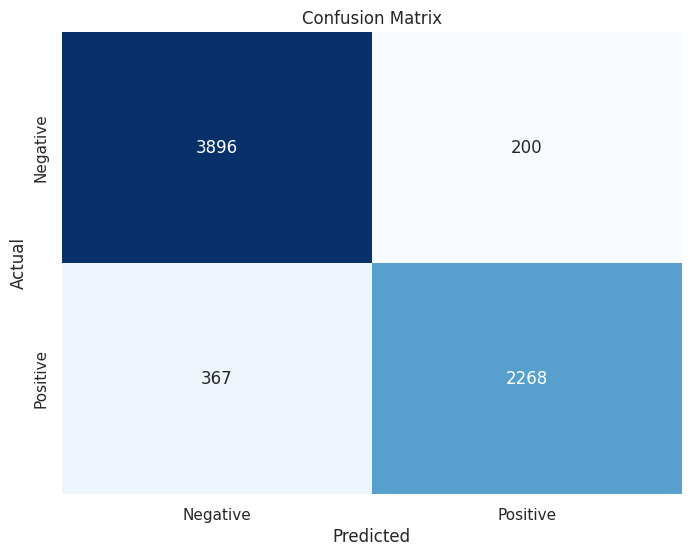

F1 Score: 0.8888888888888888
ROC AUC Score: 0.905946468809298


In [ ]:
from sklearn.metrics import roc_auc_score, f1_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set

y_pred = model.predict([X_text_test, X_prompt_id_test])

y_pred_binary = (y_pred > 0.5).astype(int)



conf_mat = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

f1 = f1_score(y_test, y_pred_binary)
print("F1 Score:", f1)

roc_auc = roc_auc_score(y_test, y_pred_binary)
print("ROC AUC Score:", roc_auc)

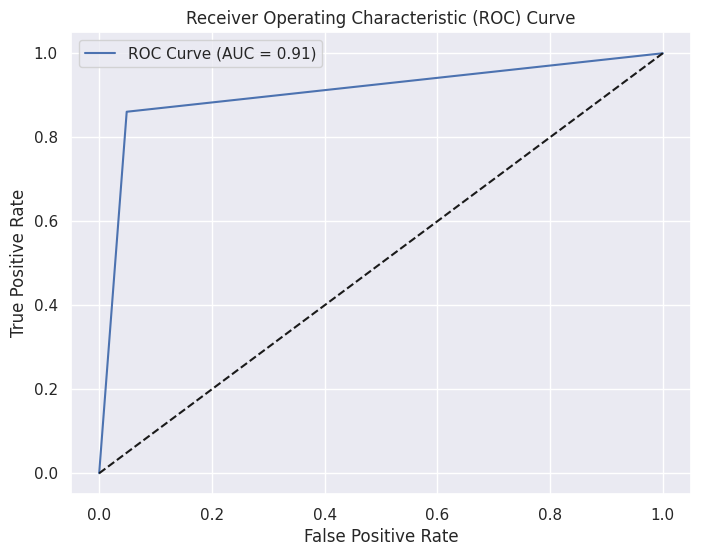

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_binary)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
model.save('my_trained_model_v2')

INFO:tensorflow:Assets written to: my_trained_model_v2/assets


INFO:tensorflow:Assets written to: my_trained_model_v2/assets


Testing with your own samples!!!

In [ ]:
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub

# Load the trained model
model = tf.keras.models.load_model('my_trained_model_v2', custom_objects={'KerasLayer': hub.KerasLayer})

# Sample DataFrame for testing
test_data = pd.DataFrame({
    'text': ['Driverless cars have the potential to significantly enhance road safety by reducing human error, which is a leading cause of accidents. They could also improve traffic efficiency and provide greater mobility for people who cannot drive. However, challenges such as technological reliability, cybersecurity, and ethical decision-making in critical situations need to be addressed before widespread adoption.'],
    'prompt_id': [6]
})
#Driverless cars
# Preprocess the test text data
X_text_test = test_data['text'].values
X_prompt_id_test = test_data[['prompt_id']].values

# Make predictions on the test data
predictions = model.predict([X_text_test, X_prompt_id_test])

print("Predictions: ", predictions)

1/1 [==============================] - 1s 585ms/step
Predictions:  [[0.9997329]]
